# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

In [1]:
# Preventing Tensorflow to use all available RAM
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")
if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)

2026-01-27 22:25:16.965136: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-27 22:25:17.410471: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-27 22:25:18.766775: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape



((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [14]:
# One-hot encoding the labels
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

In [15]:
#Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Class names for reference [extracted from documentation]
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

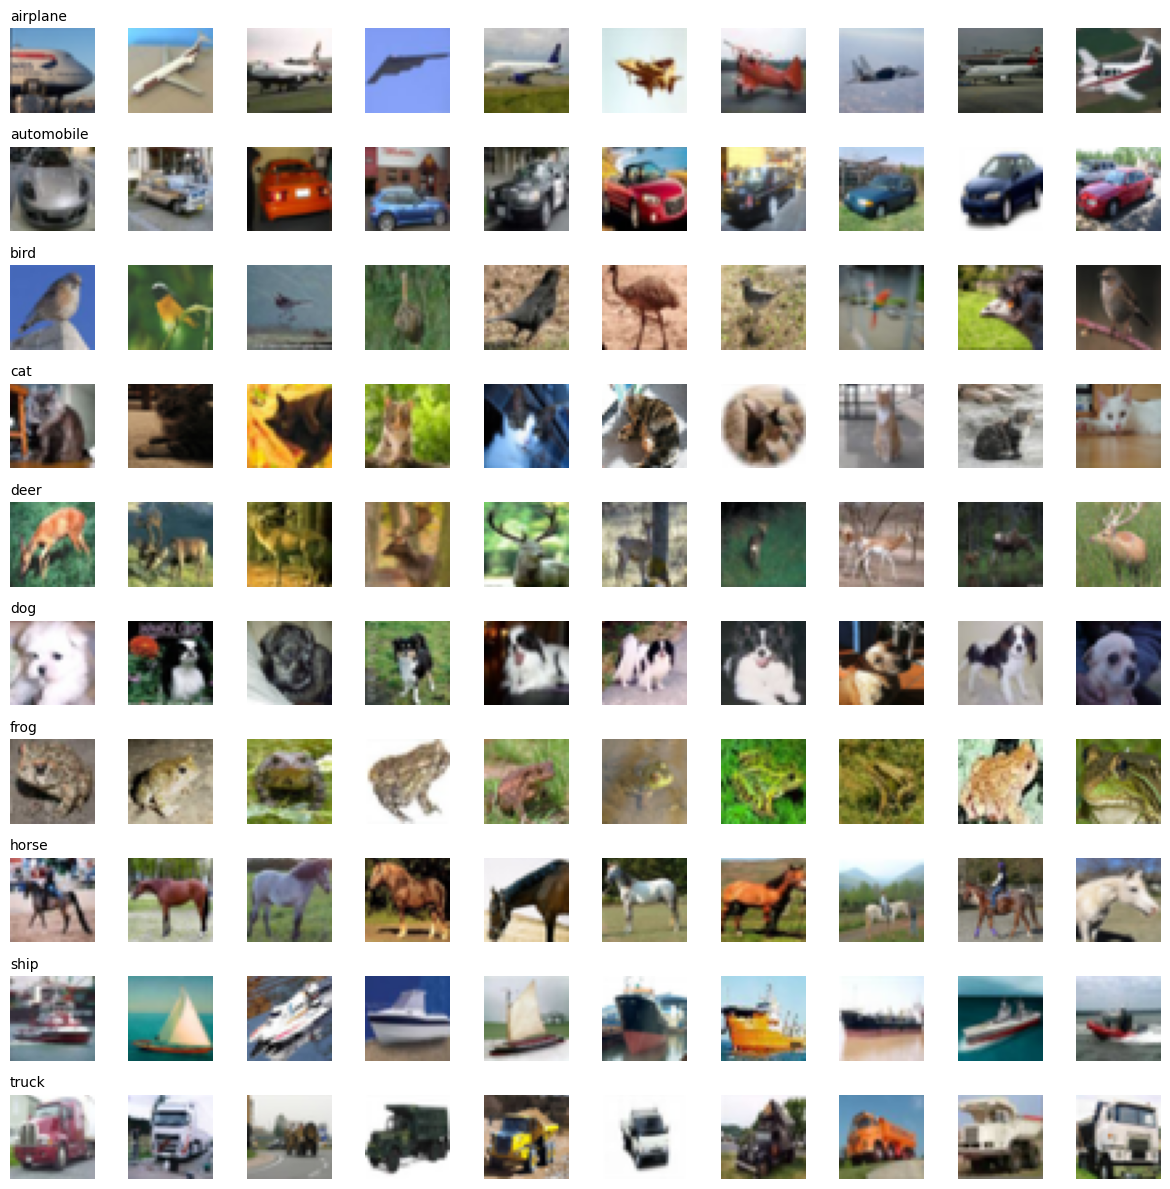

In [ ]:
# Setup the plot
fig, axes = plt.subplots(10, 10, figsize=(12, 12))

for i in range(10):  # Iterate through each class
    # Find indices where the label matches the current class
    indices = np.where(y_train == i)[0]
    # Select 10 random indices from that specific class
    selected_indices = np.random.choice(indices, 10, replace=False)
    
    for j, idx in enumerate(selected_indices):
        ax = axes[i, j]
        ax.imshow(x_train[idx])
        ax.axis('off')
        # Label the first image of every row for clarity
        if j == 0:
            ax.set_title(classes[i], loc='left', fontsize=10)

plt.tight_layout()
plt.show()

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [12]:
from keras.backend import clear_session
clear_session()

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D
from keras import Input

# Model / data parameters
num_class = 10
input_shape = (32, 32, 3)

# Building the model

model = Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_class, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [17]:
# Train the model
batch_size = 512
epochs = 50

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model.fit(x_train, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5642 - loss: 1.2534 - val_accuracy: 0.5610 - val_loss: 1.2683
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5667 - loss: 1.2422 - val_accuracy: 0.5670 - val_loss: 1.2553
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5676 - loss: 1.2348 - val_accuracy: 0.5616 - val_loss: 1.2715
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5717 - loss: 1.2257 - val_accuracy: 0.5624 - val_loss: 1.2597
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5735 - loss: 1.2219 - val_accuracy: 0.5638 - val_loss: 1.2487
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5743 - loss: 1.2204 - val_accuracy: 0.5614 - val_loss: 1.2597
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5785 - loss: 1.2125 - val_accuracy: 0.5690 - val_loss: 1.2485
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5808 - loss: 1.2072 - val_accuracy: 0.5710 - val_loss

*   Plot the cross entropy loss curve and the accuracy curve

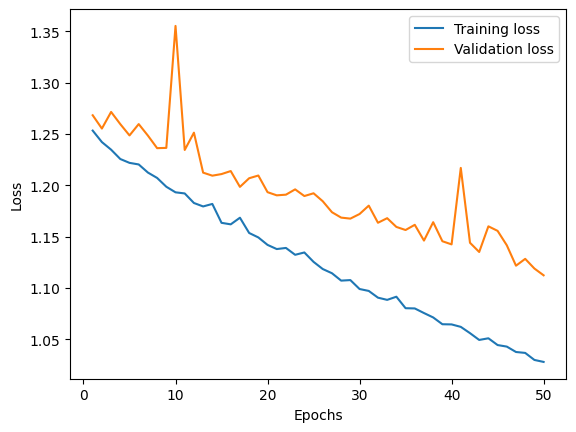

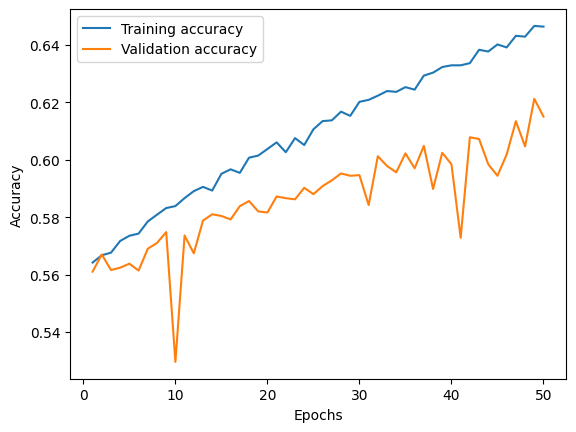

In [22]:
# storing loss metrics
val_loss = history.history['val_loss']
loss = history.history['loss']

# Cleaner and more explicit than hardcoding a range - becomes useful when EarlyStopping comes into play
epoch_axis = range(1, len(history.history["loss"]) + 1)

plt.figure()
plt.plot(epoch_axis, loss, label="Training loss")
plt.plot(epoch_axis, val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# storing accuracy metrics
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure()
plt.plot(epoch_axis, accuracy, label="Training accuracy")
plt.plot(epoch_axis, val_accuracy, label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [27]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Model / data parameters
num_class = 10
input_shape = (32, 32, 3)

# VGG stands for Visual Geometry Group. A design philosophy for CNNs
# Go deep using many small (3x3) convolutions, stacked together, with occasional pooling

# Building the model
model = Sequential()
model.add(Input(shape=input_shape))
# Following our VGG-style structure we add two (3x3) Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
# Padding is explicitly kept the same to not lose resolution
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_class, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [29]:
# model hyperparameters
epochs = 50
batch_size = 512

# Compile 
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Fit
history = model.fit(x_train, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50


2026-01-28 00:06:07.064303: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_348', 64 bytes spill stores, 64 bytes spill loads

2026-01-28 00:06:07.262302: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_348', 1048 bytes spill stores, 1048 bytes spill loads



87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1404 - loss: 2.2829

2026-01-28 00:06:09.994432: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_348', 100 bytes spill stores, 100 bytes spill loads



88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.1631 - loss: 2.2574 - val_accuracy: 0.2294 - val_loss: 2.1929
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2567 - loss: 2.1122 - val_accuracy: 0.2736 - val_loss: 2.0373
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2916 - loss: 2.0011 - val_accuracy: 0.2996 - val_loss: 1.9636
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3214 - loss: 1.9293 - val_accuracy: 0.3364 - val_loss: 1.8999
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3442 - loss: 1.8728 - val_accuracy: 0.3490 - val_loss: 1.8659
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3623 - loss: 1.8222 - val_accuracy: 0.3688 - val_loss: 1.8095
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3770 - loss: 1.7866 - val_accuracy: 0.3764 - val_loss: 1.7952
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3833 - loss: 1.7600 - val_accuracy: 0.3792 - val_loss: 1.7856
Ep

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

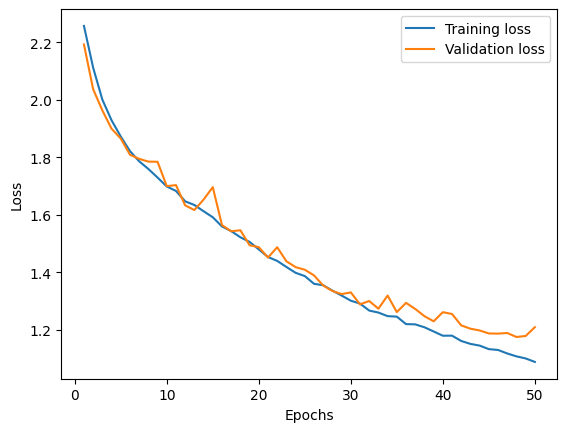

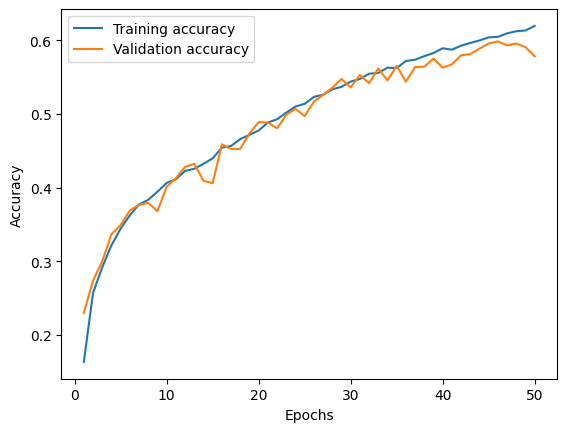

In [30]:
# storing loss metrics
val_loss = history.history['val_loss']
loss = history.history['loss']

# Cleaner and more explicit than hardcoding a range - becomes useful when EarlyStopping comes into play
epoch_axis = range(1, len(history.history["loss"]) + 1)

plt.figure()
plt.plot(epoch_axis, loss, label="Training loss")
plt.plot(epoch_axis, val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# storing accuracy metrics
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure()
plt.plot(epoch_axis, accuracy, label="Training accuracy")
plt.plot(epoch_axis, val_accuracy, label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Comment on the observation**

The deeper VGG-style model shows more stable generalization with a smaller train-validation gap, but converges more slowly under the same timeframe (epochs). Given more time or improved optimization, it is expected to outperform the less deeper model.
...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
# Store predictions
predictions = model.predict(x_test)

# axis=1 picks the index of the highest probability per sample
predictions = np.argmax(predictions, axis=1)

#predictions.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step


(10000,)

In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[425,  20, 163,  24,  20,  41,  12,   7, 233,  55],
       [ 23, 590,  28,  18,   6,  19,  10,   6,  97, 203],
       [ 28,   6, 569,  59, 100, 127,  41,  23,  31,  16],
       [  5,   7, 111, 346,  80, 342,  54,   9,  22,  24],
       [ 10,   3, 182,  46, 514, 126,  56,  30,  23,  10],
       [  2,   2,  85, 122,  56, 650,  27,  23,  21,  12],
       [  3,   6, 101,  74,  95,  88, 598,   7,  16,  12],
       [ 11,   2,  66,  61,  93, 189,  14, 506,  15,  43],
       [ 27,  37,  37,  16,  15,  25,   2,   3, 791,  47],
       [ 18,  84,  26,  26,  13,  35,  13,  20,  84, 681]])

**Comment here :**

The model has learned broad classes (animals vs shapes) but it still struggles in identifying similar subclasses (cat vs dog)

...

*    Print the test accuracy for the trained model.

In [39]:
# Evaluate the model for metrics
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test accuracy:", test_accuracy)


Test accuracy: 0.5669999718666077


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [40]:
from keras.backend import clear_session
clear_session()

In [41]:
# Model / data parameters
num_class = 10
input_shape = (64, 64, 3)

# VGG stands for Visual Geometry Group. A design philosophy for CNNs
# Go deep using many small (3x3) convolutions, stacked together, with occasional pooling

# Building the model
model = Sequential()
model.add(Input(shape=input_shape))
# Following our VGG-style structure we add two (3x3) Convolutional layers
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
# Padding is explicitly kept the same to not lose resolution
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_class, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [43]:
# Changing images from 32x32 to 64x64 to match model input size
x_train = tf.image.resize(x_train, (64, 64))
x_test  = tf.image.resize(x_test, (64, 64))

In [44]:
# model hyperparameters
epochs = 10
batch_size = 512

# Compile 
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Fit
history = model.fit(x_train, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10


2026-01-28 00:42:09.061353: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_628', 64 bytes spill stores, 64 bytes spill loads

2026-01-28 00:42:09.291664: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_628', 1048 bytes spill stores, 1048 bytes spill loads

2026-01-28 00:42:16.162053: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng25{k2=0,k3=0} for conv (f32[512,64,64,64]{3,2,1,0}, u8[0]{0}) custom-call(f32[512,64,64,64]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leak

87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.1160 - loss: 2.3019

2026-01-28 00:42:30.075884: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_628', 100 bytes spill stores, 100 bytes spill loads

2026-01-28 00:42:35.404253: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 7.70GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


88/88 ━━━━━━━━━━━━━━━━━━━━ 36s 260ms/step - accuracy: 0.1284 - loss: 2.3008 - val_accuracy: 0.1422 - val_loss: 2.2985
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.1300 - loss: 2.2957 - val_accuracy: 0.1372 - val_loss: 2.2915
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.1338 - loss: 2.2831 - val_accuracy: 0.1488 - val_loss: 2.2685
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.1967 - loss: 2.2272 - val_accuracy: 0.2412 - val_loss: 2.1603
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.2433 - loss: 2.1222 - val_accuracy: 0.2500 - val_loss: 2.0911
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.2726 - loss: 2.0602 - val_accuracy: 0.2750 - val_loss: 2.0303
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.3019 - loss: 1.9818 - val_accuracy: 0.3220 - val_loss: 1.9272
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.3296 - loss: 1.9037 - val_accuracy: 0.3312 - val_l

In [50]:
# Predictions
model3_predictions = model.predict(x_test)

# axis=1 picks the index of the highest probability per sample
model3_predictions = np.argmax(model3_predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, model3_predictions)

cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[560,  40,  72,   8,  33,  19,  42,  70,  88,  68],
       [ 61, 351,  28,  11,  13,  45, 130, 106,  44, 211],
       [108,  36, 216,  26, 182,  71, 251,  77,  16,  17],
       [ 39,  31,  92,  65, 111, 198, 324,  78,  12,  50],
       [ 46,   6, 101,  11, 371,  55, 296,  87,  11,  16],
       [ 27,  13, 115,  39, 124, 347, 211,  87,  15,  22],
       [  8,   6,  76,   7, 130,  40, 684,  23,   3,  23],
       [ 44,  22,  56,  16, 153,  76,  95, 462,  16,  60],
       [222,  54,  16,  16,  17,  42,  45,  63, 402, 123],
       [ 67,  90,  16,   6,  12,  31, 113, 127,  56, 482]])

In [51]:
# Accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.39399999380111694


# Comments

Despite increase depth, the full VGG-style model achieves a lower accuracy score (~39%) indicating worse generalization (struggles with unseen data).  The confusion matrix reveals overall class confusion with weaker diagonal dominance, suggesting the model struggles to tell classes apart. The behavior can be explained by the increased input resolution (64x64) without additional informative contente (original images are 32x32), the high number of parameters concentrated in the dense layers and insufficient optimization time using SGD.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

The activation functions exist to decide mathematically if a neuron is activated and introduce non-linearity allowing the model
recognize complex patters beyond linear relationships.

2 - Key Differences between sigmoid and softmax:

sigmoid function is used for binary classification, mapping inputs to indepedent 0-1 probabilities
softmax is used for multi-class classification, mapping vector raw scores into probabilities that add up to 1

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary crossentropy outputs are 1 and Categorical outputs multiple classes.
Categorical CE will add probabilities up to 1 while on binary crossentropy is not required.
They're activaction functions are 'sigmoid' for binary crossentropy and 'softmax' for categorical crossentropy.
In summary, they are used to classify different problems. 

_
